# Advanced Data Analysis:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import scipy
from scipy import stats
from scipy.interpolate import interp1d
from scipy.signal import butter, filtfilt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [2]:
df = pd.read_csv('Data Frame (After Setp 3).csv')

In [3]:
df

,Unnamed: 0,Country,English Level,Price,Diploma,Certificate,Response Time,No Of Lessons,Stars,Reviews,Popularity Score
0,0,United States of America,A2,126,No,No,5,6473,4.9,65,8.883275
1,1,United States of America,A1,52,No,No,24,560,5.0,8,4.515450
2,2,Ghana,Native,45,Yes,No,1,10328,4.8,117,9.927292
3,3,United States of America,Native,74,Yes,Yes,1,423,5.0,6,3.890756
4,4,United Kingdom,Native,67,No,Yes,7,7444,4.8,156,10.526998
...,...,...,...,...,...,...,...,...,...,...,...
7303,7303,United States of America,Native,104,Yes,Yes,8,1156,5.0,6,3.890756
7304,7304,Egypt,C1,37,No,Yes,2,30,5.0,2,1.505150
7305,7305,United States of America,Native,149,Yes,No,2,62,5.0,3,2.385606
7306,7306,France,Native,75,Yes,Yes,4,531,5.0,5,3.494850


After careful consideration, we have made the decision to drop the columns of Stars and Reviews from our dataset. This decision was influenced by the calculations performed in step 2, which indicated a need to remove these columns to avoid bias in the data.

By removing the Stars and Reviews columns, we aim to eliminate any potential influence or bias that these variables may have on our analysis. This ensures that our subsequent analyses and models are based on unbiased data, allowing for more accurate and reliable results.

In [4]:
df2 = df.copy()
df2 = df2.drop(['Unnamed: 0','Stars','Reviews'], axis=1)

In [5]:
df2

,Country,English Level,Price,Diploma,Certificate,Response Time,No Of Lessons,Popularity Score
0,United States of America,A2,126,No,No,5,6473,8.883275
1,United States of America,A1,52,No,No,24,560,4.515450
2,Ghana,Native,45,Yes,No,1,10328,9.927292
3,United States of America,Native,74,Yes,Yes,1,423,3.890756
4,United Kingdom,Native,67,No,Yes,7,7444,10.526998
...,...,...,...,...,...,...,...,...
7303,United States of America,Native,104,Yes,Yes,8,1156,3.890756
7304,Egypt,C1,37,No,Yes,2,30,1.505150
7305,United States of America,Native,149,Yes,No,2,62,2.385606
7306,France,Native,75,Yes,Yes,4,531,3.494850


The code utilizes one-hot encoding to transform categorical variables in the DataFrame into binary columns. This encoding technique is employed to represent each category as a separate column with binary values (0 or 1). By doing so, it enables machine learning algorithms to effectively process and analyze categorical data.

This transformation allows the categorical variables to be interpreted as numerical features, providing a format that can be easily understood and processed by machine learning models. It helps to remove any ordinal or hierarchical relationships between categories, treating them as independent attributes.

In [6]:
df2 = pd.get_dummies(df2)
df2

,Price,Response Time,No Of Lessons,Popularity Score,Country _Afghanistan,Country _Albania,Country _Algeria,Country _Antigua and Barbuda,Country _Argentina,Country _Armenia,...,English Level_A2,English Level_B1,English Level_B2,English Level_C1,English Level_C2,English Level_Native,Diploma_No,Diploma_Yes,Certificate_No,Certificate_Yes
0,126,5,6473,8.883275,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False
1,52,24,560,4.515450,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,45,1,10328,9.927292,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
3,74,1,423,3.890756,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
4,67,7,7444,10.526998,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7303,104,8,1156,3.890756,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
7304,37,2,30,1.505150,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
7305,149,2,62,2.385606,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
7306,75,4,531,3.494850,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True


Creating the X and Y data for the ML

In [7]:
X = df2.drop(columns = ['Popularity Score'])
y = df2['Popularity Score']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size = 0.2, random_state=42)

**Random Forest Model:**

The Random Forest model is a machine learning algorithm that belongs to the ensemble learning category. It combines multiple decision trees to make predictions.

In a Random Forest, each decision tree is trained on a different subset of the data and uses a random selection of features. During the training process, the decision trees collectively make predictions, and the final prediction is determined by averaging or voting among the predictions of individual trees.

In [8]:
regr = RandomForestRegressor()
regr.fit(X=X_train1, y=y_train1)
Rfm_pred1 = regr.predict(X_test1)

In [9]:
Rfm_error = mean_squared_error(y_test1,Rfm_pred1)
Rfm_r2 = r2_score(y_test1,Rfm_pred1)
print("Random Forest Model R2 Score Normalized R-squared:", Rfm_r2.round(4))

Random Forest Model R2 Score Normalized R-squared: 0.7542


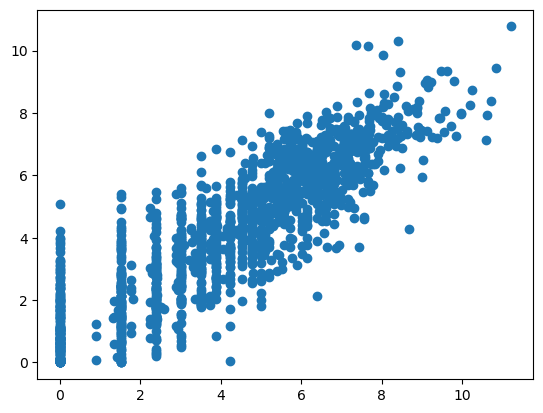

In [10]:
plt.scatter(y_test1,Rfm_pred1)

**Svm Model:**

SVM (Support Vector Machine) is a powerful supervised machine learning algorithm used for both regression and classification tasks.
It works by creating a hyperplane or a set of hyperplanes in a high-dimensional feature space that separates different classes or maximizes the margin between data points.

SVM is particularly effective in scenarios where the data is not linearly separable. It achieves this by transforming the data into a higher-dimensional space using a kernel function, allowing for more complex decision boundaries

In [11]:
svm = SVR()
svm.fit(X_train1, y_train1)
Svm_pred1 = svm.predict(X_test1)

In [12]:
Svm_error = mean_squared_error(y_test1, Svm_pred1)
Svm_r2 = r2_score(y_test1, Svm_pred1)
print("Support Vector Machine R2 Score Normalized R-squared:", Svm_r2.round(4))

Support Vector Machine R2 Score Normalized R-squared: 0.7146


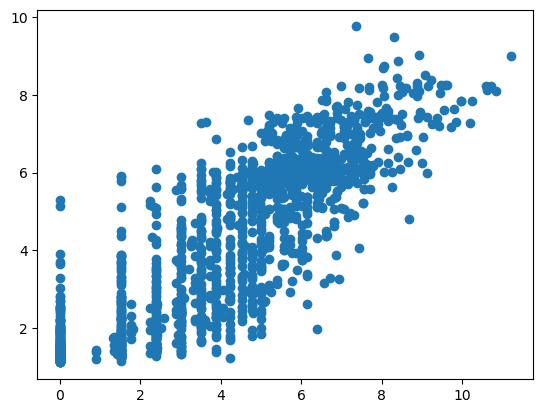

In [13]:
plt.scatter(y_test1,Svm_pred1)

**Decision Tree Model:**

A decision tree is a supervised machine learning algorithm that uses a hierarchical structure of decision rules to make predictions or classifications.
It represents a flowchart-like structure, where each internal node represents a decision based on a feature, and each leaf node represents an outcome or prediction.

The decision tree algorithm learns from the data by recursively splitting the dataset based on the values of different features, aiming to maximize the homogeneity or purity of each resulting subset. This splitting process continues until a stopping criterion is met, such as reaching a maximum depth or having a minimum number of samples in each leaf node.

In [14]:
clf = tree.DecisionTreeRegressor()
trained_model_tree = clf.fit(X=X_train1, y=y_train1)
Dt_pred1 = trained_model_tree.predict(X_test1)

In [15]:
Dt_error = mean_squared_error(y_test1, Dt_pred1)
Dt_r2 = r2_score(y_test1, Dt_pred1)
print("Decision Tree Model R2 Score Normalized R-squared:", Dt_r2.round(4))

Decision Tree Model R2 Score Normalized R-squared: 0.5661


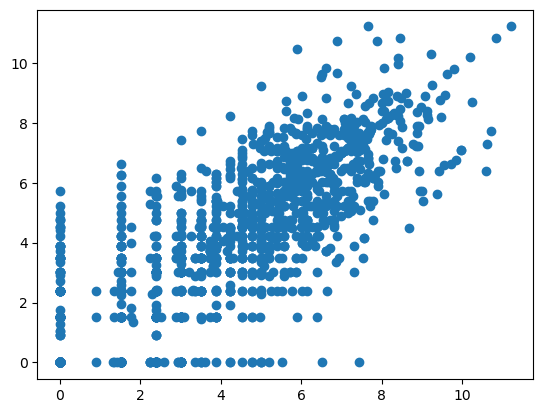

In [16]:
plt.scatter(y_test1,Dt_pred1)

## Attempts to improve the model

To enhance the model's performance, we attempted to improve the score results by scaling the data. Scaling is a common preprocessing step that aims to standardize the range of feature values.

By scaling the data, we aimed to bring all features to a similar scale, which can help prevent certain features from dominating the model's learning process.

In [17]:
df3 = df2.copy()
df3

,Price,Response Time,No Of Lessons,Popularity Score,Country _Afghanistan,Country _Albania,Country _Algeria,Country _Antigua and Barbuda,Country _Argentina,Country _Armenia,...,English Level_A2,English Level_B1,English Level_B2,English Level_C1,English Level_C2,English Level_Native,Diploma_No,Diploma_Yes,Certificate_No,Certificate_Yes
0,126,5,6473,8.883275,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False
1,52,24,560,4.515450,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,45,1,10328,9.927292,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
3,74,1,423,3.890756,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
4,67,7,7444,10.526998,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7303,104,8,1156,3.890756,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
7304,37,2,30,1.505150,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
7305,149,2,62,2.385606,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
7306,75,4,531,3.494850,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True


In [18]:
df3['Price'].describe()

count    7308.000000
mean       61.586344
std        40.369666
min        11.000000
25%        33.000000
50%        56.000000
75%        78.000000
max       373.000000
Name: Price, dtype: float64

In [19]:
df3['No Of Lessons'].describe()

count     7308.000000
mean       919.185413
std       1344.483309
min          1.000000
25%        130.000000
50%        447.000000
75%       1167.250000
max      21336.000000
Name: No Of Lessons, dtype: float64

After observing the descriptive statistics of the "price" and "number of lessons" columns, we noticed a significant disparity between the average, minimum, maximum, and mean values.
To address this discrepancy and ensure that these features are on a comparable scale, we made the decision to scale them. By scaling the "price" and "number of lessons" columns, we aimed to normalize the range of values and bring them into a more consistent and interpretable range. Scaling these columns can help mitigate any potential biases or influences that may arise from the differences in magnitude.

In [20]:
numerical_cols = df3.columns[df3.columns.isin(['Price','No Of Lessons'])]

In [21]:
z_score_scaler = StandardScaler()
df3[numerical_cols] = z_score_scaler.fit_transform(df3[numerical_cols])

# min_max_scaler = MinMaxScaler()
# df3[numerical_cols] = min_max_scaler.fit_transform(df3[numerical_cols])

In [22]:
df3['Price'].describe()

count    7308.000000
mean        0.000000
std         1.000068
min        -1.253164
25%        -0.708163
50%        -0.138389
75%         0.406612
max         7.714579
Name: Price, dtype: float64

In [23]:
df3['No Of Lessons'].describe()

count    7.308000e+03
mean    -4.666947e-17
std      1.000068e+00
min     -6.829748e-01
25%     -5.870206e-01
50%     -3.512262e-01
75%      1.845181e-01
max      1.518666e+01
Name: No Of Lessons, dtype: float64

We employed techniques like standardization (mean normalization) or normalization (min-max scaling) to rescale the feature values. Standardization transforms the data to have zero mean and unit variance, while normalization scales the data to a specified range, typically between 0 and 1.

By scaling the data, we aimed to improve the model's convergence, stability, and overall performance. It can help algorithms to learn faster, avoid numerical instabilities, and make more accurate predictions.

In [24]:
X = df3.drop(columns = ['Popularity Score'])
y = df3['Popularity Score']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y, test_size=0.2, random_state=42)

**Random Forest Model:**

In [25]:
regr = RandomForestRegressor()
regr.fit(X=X_train2, y=y_train2)
Rfm_pred2 = regr.predict(X_test2)

In [26]:
Rfm_error_2 = mean_squared_error(y_test2,Rfm_pred2)
Rfm_r2_2 = r2_score(y_test2,Rfm_pred2)
print("Random Forest Model R2 Score Normalized R-squared:", Rfm_r2_2.round(4))

Random Forest Model R2 Score Normalized R-squared: 0.7538


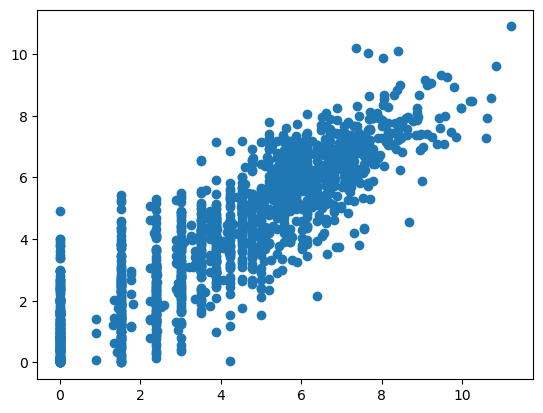

In [27]:
plt.scatter(y_test2,Rfm_pred2)

**Svm Model:**

In [28]:
svm = SVR()
svm.fit(X_train2, y_train2)
Svm_pred2 = svm.predict(X_test2)

In [29]:
Svm_error_2 = mean_squared_error(y_test2, Svm_pred2)
Svm_r2_2 = r2_score(y_test2, Svm_pred2)
print("Support Vector Machine R2 Score Normalized R-squared:", Svm_r2_2.round(4))

Support Vector Machine R2 Score Normalized R-squared: 0.5883


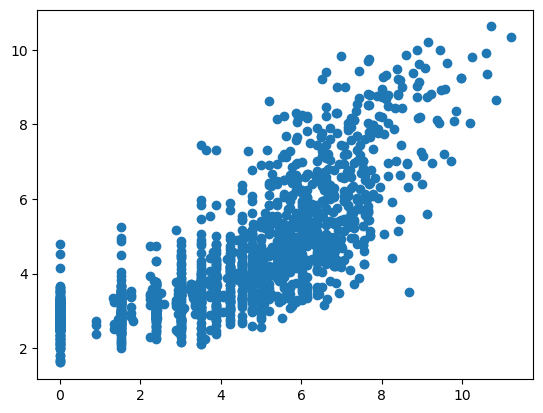

In [30]:
plt.scatter(y_test2,Svm_pred2)

**Decision Tree Model:**

In [31]:
clf = tree.DecisionTreeRegressor()
trained_model_tree = clf.fit(X=X_train2, y=y_train2)
Dt_pred2 = trained_model_tree.predict(X_test2)

In [32]:
Dt_error_2 = mean_squared_error(y_test2, Dt_pred2)
Dt_r2_2 = r2_score(y_test2, Dt_pred2)
print("Decision Tree Model R2 Score Normalized R-squared:", Dt_r2_2.round(4))

Decision Tree Model R2 Score Normalized R-squared: 0.5671


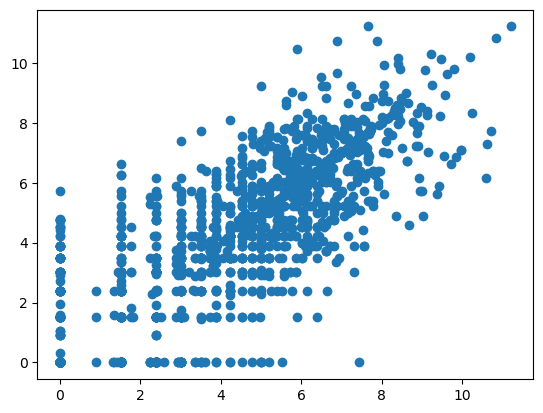

In [33]:
plt.scatter(y_test2,Dt_pred2)

**After scaling the data, we retrained the model and evaluated its performance to assess if there was any improvement in the score results.
Unfortunately, despite our efforts, we did not observe any significant improvement in the model's performance**

In this table, we can observe the predictions made by the machine learning model alongside the true values. It provides a comprehensive overview of how well the model performed in predicting the target variable


In [34]:
df_check = df2.copy()
Raw_values = df_check['Popularity Score']
df_check = df_check.drop(columns = ['Popularity Score'])

In [35]:
Rf_pred_check = regr.predict(df_check)
df = pd.DataFrame({'Raw':Raw_values,'predicted':Rf_pred_check.round(4)})
df['percentage'] = ((pd.DataFrame({'min_percentage': df['predicted'] / df['Raw'], 'max_percentage': df['Raw'] / df['predicted']})).min(axis=1) * 100).round(2)
    
df

,Raw,predicted,percentage
0,8.883275,10.4449,85.05
1,4.515450,10.5903,42.64
2,9.927292,10.9678,90.51
3,3.890756,11.6822,33.30
4,10.526998,10.7664,97.78
...,...,...,...
7303,3.890756,10.5670,36.82
7304,1.505150,11.5905,12.99
7305,2.385606,11.0120,21.66
7306,3.494850,10.8694,32.15


The graph illustrates the distribution of all the values in our dataset in comparison to the model's predictions. The graph provides a visual representation of the data.
The scatter plots show the relationship between the true values (y_test) and the predicted values (lr_pred, svm_pred, rf_pred) for each model. The x-axis and y-axis are both displayed on a logarithmic scale. The blue line represents a perfect prediction, where the true values and predicted values are equal. 

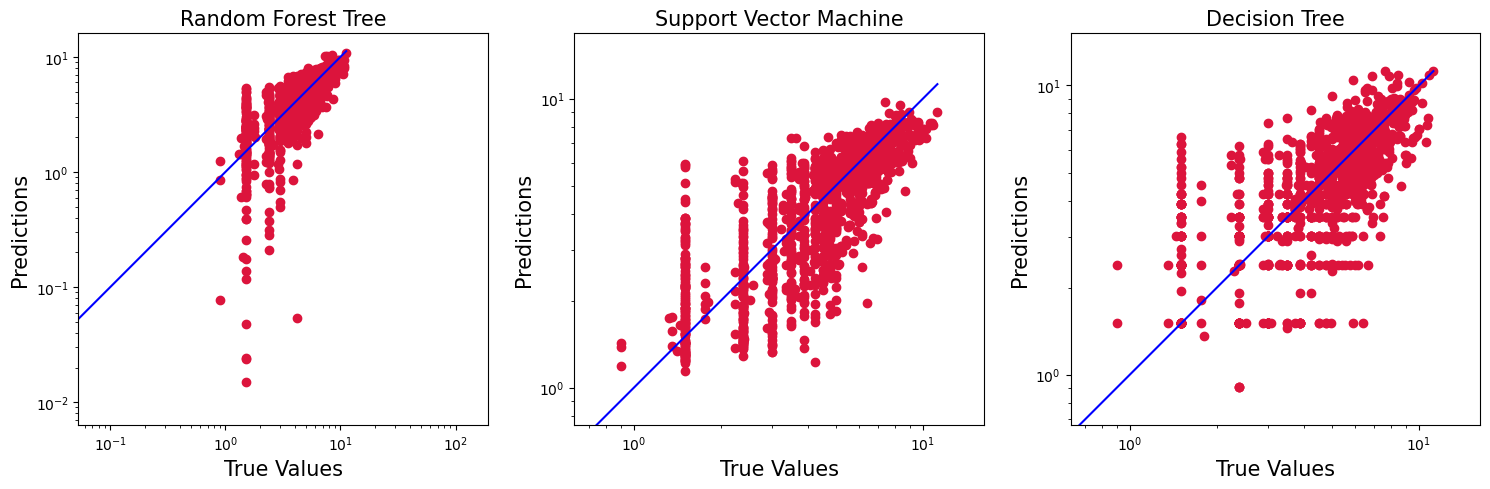

In [36]:
# Predictions before improving

plt.figure(figsize=(15, 5))
# Subplot 1:
plt.subplot(1, 3, 1)
plt.scatter(y_test1, Rfm_pred1, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_test1), max(Rfm_pred1))
p2 = min(min(y_test1), min(Rfm_pred1))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Random Forest Tree', fontsize=15)
plt.axis('equal')

# Subplot 2:
plt.subplot(1, 3, 2)
plt.scatter(y_test1, Svm_pred1, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_test1), max(Svm_pred1))
p2 = min(min(y_test1), min(Svm_pred1))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Support Vector Machine', fontsize=15)
plt.axis('equal')


# Subplot 3:
plt.subplot(1, 3, 3)
plt.scatter(y_test1, Dt_pred1, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_test1), max(Dt_pred1))
p2 = min(min(y_test1), min(Dt_pred1))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Decision Tree', fontsize=15)
plt.axis('equal')

plt.tight_layout()
plt.show()

## Conclusions


In conclusion, our research demonstrates that it is possible to predict the popularity of  English tutors on the Preply platform with a high success rate (above 75%). 

- Feature Importance: Through our analysis, we determined that the "Number of Lessons" was the most influential feature in predicting the popularity of English tutors. This underscores the importance of experience and the number of lessons taught in establishing a teacher's reputation and attracting students.

- Surprisingly, the "Price" and "Response Time" columns did not exhibit a strong correlation with the target column, contrary to our initial expectations. 

- ML Performance: Among the algorithms we experimented with, the Random Forest model yielded the highest R2 score, indicating its effectiveness in predicting the popularity of English tutors. This reinforces the effectiveness of ensemble methods in capturing complex relationships within the dataset and making accurate predictions.

- Importance of Data Preprocessing: Data preprocessing steps, such as handling missing values, handling outliers, scaling features, and encoding categorical variables, are crucial in improving the performance of machine learning models. These steps ensure that the data is appropriately prepared and can be effectively utilized by the algorithms.

- Further Exploration: While our analysis focused on the specific task of predicting popularity on the Preply platform, there are opportunities for further exploration and research.


Undertaking this project has been both challenging and enlightening, providing valuable insights into the field of data science. We have gained a deeper understanding of data preprocessing, feature engineering, exploratory data analysis, model evaluation, and machine learning techniques. We are eager to apply these skills to future projects and continue expanding our knowledge in this domain.